# Support Vector Machine 
- it is used for classification mostly

1D - Point 
2D - Line
3D - Plane
4D -  HyperPlane
 **Support Vector Machine (SVM)** is a powerful classification algorithm that works by finding the optimal hyperplane that best separates data points into different classes. Its mathematical intuition is based on maximizing the **margin**, or the distance between the separating hyperplane and the nearest data points, which are called **support vectors**.

---
## The Core Idea: The Optimal Margin ↔️

Imagine you want to separate two groups of dots on a piece of paper with a single straight line. You could draw many possible lines, but which one is the best?

SVM's answer is to find the line that is as far away as possible from the closest dots in each group. Think of the separating line as the center of a "street" or "corridor." SVM tries to make this street as wide as possible.

* **Hyperplane**: In 2D, this is a line. In 3D, it's a flat plane. In higher dimensions, it's called a hyperplane. This is the decision boundary.
* **Support Vectors**: These are the data points closest to the hyperplane—the points that lie on the edge of the street. They are the most critical data points because they "support" or define the position of the hyperplane. If you were to move a support vector, the hyperplane would also move.
* **Margin**: This is the width of the street, the distance between the support vectors of the different classes. SVM's goal is to maximize this margin.


*SVM finds the hyperplane that maximizes the margin (street width), defined by the support vectors.*

---
## The Mathematical Intuition

The goal of SVM is to maximize the margin, which can be framed as a constrained optimization problem.

#### 1. The Hyperplane Equation
A hyperplane can be defined by the equation:
$$\mathbf{w} \cdot \mathbf{x} + b = 0$$
* $\mathbf{w}$ is the weight vector, which is normal (perpendicular) to the hyperplane. It controls the orientation of the hyperplane.
* $\mathbf{x}$ is the input feature vector.
* $b$ is the bias term, which shifts the hyperplane away from the origin.

#### 2. Defining the Margin
The two planes that form the edges of the margin (the gutters of the street) can be described by the equations:
* $\mathbf{w} \cdot \mathbf{x} + b = 1$ (for the positive class support vectors)
* $\mathbf{w} \cdot \mathbf{x} + b = -1$ (for the negative class support vectors)

The distance between these two planes, which is the margin, can be calculated as:
$$\text{Margin} = \frac{2}{||\mathbf{w}||}$$
where $||\mathbf{w}||$ is the norm (or magnitude) of the weight vector $\mathbf{w}$.

#### 3. The Optimization Problem
To **maximize the margin** ($\frac{2}{||\mathbf{w}||}$), we need to **minimize the norm** ($||\mathbf{w}||$). For mathematical convenience, we minimize $\frac{1}{2}||\mathbf{w}||^2$ instead, which is an equivalent and easier problem to solve.

This minimization is done under the constraint that all data points are classified correctly. This means for every data point $x_i$ with class label $y_i$ (+1 or -1):
$$y_i(\mathbf{w} \cdot \mathbf{x_i} + b) \ge 1$$
This single equation elegantly ensures that all points are on the correct side of the margin.

In summary, SVM solves for the $\mathbf{w}$ and $b$ that **minimize $||\mathbf{w}||$** while satisfying the classification constraint for all data points.

---
## Handling Non-Linear Data: The Kernel Trick

What if the data can't be separated by a straight line? SVM uses a powerful technique called the **kernel trick**.

The idea is to project the data into a higher-dimensional space where it *can* be separated by a hyperplane. For example, data that forms a circle in 2D might become linearly separable if projected into 3D.

The "trick" is that the kernel function allows SVM to calculate the dot products and find the optimal hyperplane in this higher-dimensional space *without* actually having to transform the data points. This is computationally efficient and allows SVM to create complex, non-linear decision boundaries.


*The kernel trick maps data to a higher dimension to make it linearly separable.*

Of course. Here's an explanation of SVM kernel functions and their types, with the necessary formulas and illustrative images.

---
## SVM Kernel Functions: Enabling Non-Linearity

The core idea of Support Vector Machines (SVMs) is to find a linear decision boundary (a hyperplane) that separates data points. However, real-world data is often not linearly separable. This is where **kernel functions** (or "kernels") come into play.

A **kernel function** is a mathematical trick that allows SVMs to operate in a high-dimensional, implicit feature space without ever explicitly calculating the coordinates of the data in that space. Essentially, it computes the dot product of two vectors in a higher-dimensional space without actually performing the projection. This is known as the **"kernel trick."**

* **Why use kernels?**
    * To allow SVM to find non-linear decision boundaries.
    * To avoid the computational cost of explicitly transforming data to higher dimensions.

---
### 1. The Kernel Trick Explained

Imagine you have data in 2D that is not linearly separable, like points forming concentric circles: 

You can't draw a straight line to separate them.
The kernel trick conceptually maps this data to a higher dimension, say 3D, where a flat plane (a hyperplane) *can* separate them: 

The kernel function implicitly performs this mapping and calculates the similarity (dot product) between points in this higher dimension, allowing the SVM to find the separating hyperplane there, and then project that decision boundary back to the original 2D space as a non-linear curve.

---
### 2. Types of Kernel Functions

Here are the most common types of kernel functions used in SVMs:

#### a) Linear Kernel
This is the simplest kernel, representing the dot product of the input features. It's used when the data is already **linearly separable** or when you want a simple, transparent model.

* **Formula**:
    $$
    K(\mathbf{x_i}, \mathbf{x_j}) = \mathbf{x_i}^T \cdot \mathbf{x_j}
    $$
    Where $\mathbf{x_i}$ and $\mathbf{x_j}$ are input feature vectors.
* **Use Case**: Text classification (high-dimensional, often linearly separable data), simple datasets.
* **Decision Boundary**: A straight line (in 2D) or a flat plane (in higher dimensions). 
    

#### b) Polynomial Kernel
This kernel allows for curved decision boundaries by mapping the data into a higher-dimensional space using polynomial combinations of the original features. The `degree` parameter ($d$) determines the complexity of the curve.

* **Formula**:
    $$
    K(\mathbf{x_i}, \mathbf{x_j}) = (\gamma \mathbf{x_i}^T \cdot \mathbf{x_j} + r)^d
    $$
    Where:
    * $d$ is the degree of the polynomial (e.g., $d=2$ for quadratic, $d=3$ for cubic).
    * $\gamma$ (gamma) is a scaling factor.
    * $r$ is a constant term (offset).
* **Use Case**: Image processing, datasets with non-linear relationships that can be modeled by polynomials.
* **Decision Boundary**: A polynomial curve (e.g., parabolic, cubic). 
    

#### c) Radial Basis Function (RBF) Kernel / Gaussian Kernel
This is the most popular and generally default kernel for SVMs. It creates a decision boundary that can capture very complex, non-linear relationships. It essentially measures the similarity of data points based on their proximity in the feature space, with the influence decreasing as the distance increases.

* **Formula**:
    $$
    K(\mathbf{x_i}, \mathbf{x_j}) = \exp(-\gamma ||\mathbf{x_i} - \mathbf{x_j}||^2)
    $$
    Where:
    * $\gamma$ (gamma) controls the influence of each training example. A small $\gamma$ means a large influence (smoother boundary), while a large $\gamma$ means a small influence (more jagged boundary, potential for overfitting).
    * $||\mathbf{x_i} - \mathbf{x_j}||^2$ is the squared Euclidean distance between the two feature vectors.
* **Use Case**: Most non-linear classification tasks, when the number of features is not extremely high.
* **Decision Boundary**: Can be highly flexible and complex, forming arbitrary shapes. 
    

#### d) Sigmoid Kernel
This kernel function is derived from the activation function used in neural networks. It can also be used for non-linear separation.

* **Formula**:
    $$
    K(\mathbf{x_i}, \mathbf{x_j}) = \tanh(\gamma \mathbf{x_i}^T \cdot \mathbf{x_j} + r)
    $$
    Where:
    * $\gamma$ (gamma) is a scaling factor.
    * $r$ is a constant term (offset).
* **Use Case**: Sometimes used in image recognition or where neural network-like separation is desired, but often less effective than RBF.
* **Decision Boundary**: Sigmoid-shaped curve, allowing for non-linear separation.

---
### Choosing a Kernel

* **Linear Kernel**: Good starting point for high-dimensional data, or when you suspect linearity. Fastest.
* **RBF Kernel**: Most common and often provides the best performance for non-linear problems. Requires tuning of the `gamma` parameter.
* **Polynomial Kernel**: Useful when you know the data has polynomial relationships. Requires tuning `degree`, `gamma`, and `r`.
* **Sigmoid Kernel**: Less commonly used than RBF, can sometimes behave like RBF but with different parameter sensitivity.

The choice of kernel often depends on the nature of the data and is usually determined through **cross-validation** and **hyperparameter tuning**.

In [1]:
import pandas as pd 

data = pd.read_csv('01Exercise1.csv')
df  = data.copy()
# null check
print(df.isnull().sum(axis=0))

# drop null rows
df =  df.dropna()

# convert categrorical data into dummy 

print(df.dtypes)

# decide featues 
# gender we are not going to consider  they are not dependent
# married , ch(creadit history) and status are categorical values 

df = df.drop(['gender'],axis=1)
df['married'] = df['married'].astype('category')
df['ch'] = df['ch'].astype('category')
df['status'] = df['status'].astype('category')

loan_data = pd.get_dummies(df, drop_first=True)

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64
gender      object
married     object
ch         float64
income       int64
loanamt    float64
status      object
dtype: object


In [2]:
# Normalize data for loanamount and income

from sklearn.preprocessing import StandardScaler

scalar= StandardScaler()
loan_data['loanamt'] = scalar.fit_transform(loan_data[['loanamt']])
loan_data['income'] = scalar.fit_transform(loan_data[['income']])

# train and test data 

Y =  loan_data[['status_Y']]
X =  loan_data.drop(['status_Y'], axis=1)

# while training and testing data split in logistic regression 

#Stratification keeps the class (0/1) proportion the same in train and test sets.
#Why needed:
# Prevents a skewed split (e.g., minority class almost missing from train or test).
# Ensures logistic regression learns correct class prior (intercept).
# Reduces variance in evaluation, especially with imbalanced data.

from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test  = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=1234)


In [3]:
from sklearn.svm import SVC

regres =  SVC()

regres.fit(x_train, y_train)

y_predict =  regres.predict(x_test)

# confusion matrix 
# actual vs predicted (TT, NN, TN, NT)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_predict)

c:\Users\vyankateshgoski\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 27,  22],
       [  1, 109]])

In [4]:
regres.score(x_test,y_test)

0.8553459119496856

Accuracy: 0.9111111111111111
Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



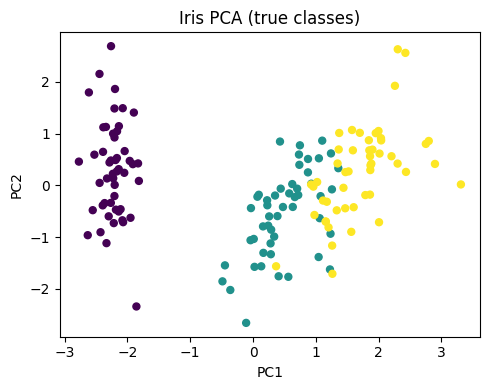

In [5]:
# ...existing code...
# iris classification problem 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.3, random_state=42
)

svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Simple 2D visualization with PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)
plt.figure(figsize=(5,4))
plt.scatter(X_2d[:,0], X_2d[:,1], c=y, cmap='viridis', s=25)
plt.title('Iris PCA (true classes)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()
# ...existing code...